Imports ⬇️ 

In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import cv2
import keras

Using TensorFlow backend.


imports + extending the amount of info in output cells ⬇️ 

In [2]:
import sys
import numpy
# numpy.set_printoptions(threshold=sys.maxsize)

Styling i think ⬇️ 

In [3]:
%matplotlib inline

⬇️⬇️Here we convert images into pixel arrays and we label them⬇️⬇️


In [28]:
DIRECTORY = r'C:\Users\Javonne\Downloads\dogscats\train'
CATEGORIES = ['cats', 'dogs']

data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        data.append([new_arr, label])

In [5]:
data[22000]

[array([[128, 134, 128, ..., 179, 179, 177],
        [127, 130, 133, ..., 208, 207, 207],
        [126, 132, 136, ..., 204, 205, 206],
        ...,
        [ 61,  63,  63, ..., 175, 181, 169],
        [ 62,  58,  62, ..., 189, 174, 168],
        [ 60,  61,  62, ..., 189, 195, 193]], dtype=uint8),
 1]

Data represents our dataset filled with images of both cats on dogs. Data[a] will return the specific pixel array for the image indexed at position a within the array as well as the label of the. Whereas data[a][0] and data[a][1] will return the pixel array and the population member respectively 

In the cell above, Data in in order. All of the cats and then all of the dogs. In the following cell we use the random library to shuffle the data to mix the cats and dogs randomly. We do this so our CNN gets used to identifying both cats and dogs while it trains and we will therfore avoid it initial overfitting to only recognise one of the two

In [6]:
random.shuffle(data)

features(the pixel array) and label(the catdog id of the image) are set to two separate arrays, x and y. 

In [7]:
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

X = np.array(X)
y = np.array(y)

In [8]:
X[1]


array([[ 87,  70,  67, ...,  72,  79,  83],
       [ 82,  75,  74, ..., 103,  65,  93],
       [ 99,  65,  74, ...,  78,  92,  85],
       ...,
       [ 51,  62,  56, ...,  75,  60,  53],
       [ 53,  61,  63, ...,  53,  58,  64],
       [ 77, 145, 153, ...,  59,  64,  74]], dtype=uint8)

⬇️⬇️Dumping our X(pixel array) and y(catdog label) into separate pkl files⬇️⬇️

In [9]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

X represents the pixel array for an image in our dataset. The reshape works as follows:

x.reshape(a, b, c, d)

a = -1, This decides how many sets of 60x60 arrays we have automatically

b,c = 60,60, This shapes our data in the format 60x60 rowsXcollumn



In [10]:
X = X.reshape(-1, 60, 60, 1)

We create the structure of the CNN

In [11]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

We set the Optimise and loss functions as well as declare accuracy as a metric that we wish to track

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We now fit the model. Here is where the model actually "learns". We tune the weights and biases to maximize or minimize a function (In our case maximize accuracy via the adam function)

In [13]:
model.fit(X, y, epochs=10, validation_split=0.1)

Train on 20700 samples, validate on 2300 samples
Epoch 1/10
20700/20700 [==============================] - 75s 4ms/step - loss: 1.4012 - accuracy: 0.5408 - val_loss: 0.6843 - val_accuracy: 0.5391
Epoch 2/10
20700/20700 [==============================] - 73s 4ms/step - loss: 0.6783 - accuracy: 0.5605 - val_loss: 0.6833 - val_accuracy: 0.5487
Epoch 3/10
20700/20700 [==============================] - 74s 4ms/step - loss: 0.6695 - accuracy: 0.5851 - val_loss: 0.6823 - val_accuracy: 0.5561
Epoch 4/10
20700/20700 [==============================] - 74s 4ms/step - loss: 0.6495 - accuracy: 0.6074 - val_loss: 0.6955 - val_accuracy: 0.5670
Epoch 5/10
20700/20700 [==============================] - 75s 4ms/step - loss: 0.6223 - accuracy: 0.6453 - val_loss: 0.7592 - val_accuracy: 0.5443
Epoch 6/10
20700/20700 [==============================] - 74s 4ms/step - loss: 0.5837 - accuracy: 0.6759 - val_loss: 0.7000 - val_accuracy: 0.6274
Epoch 7/10
20700/20700 [==============================] - 75s 4ms/ste

We output a high level description of the CNN

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 58, 58, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_2 (Dense)              (None, 2)                

In [15]:
X.shape

(23000, 60, 60, 1)

testpath = r'Users\Javonne\Downloads\dog.jpg'

prediction = model.predict(X[0])

print(CATEGORIES[prediction.argmax()])

In [16]:
X[0], y[0]

(array([[[179],
         [179],
         [179],
         ...,
         [197],
         [197],
         [197]],
 
        [[179],
         [179],
         [179],
         ...,
         [196],
         [197],
         [197]],
 
        [[179],
         [179],
         [179],
         ...,
         [197],
         [197],
         [201]],
 
        ...,
 
        [[207],
         [209],
         [210],
         ...,
         [119],
         [158],
         [150]],
 
        [[203],
         [211],
         [202],
         ...,
         [109],
         [119],
         [104]],
 
        [[203],
         [203],
         [206],
         ...,
         [108],
         [134],
         [180]]], dtype=uint8),
 0)

In [17]:
y

array([0, 0, 0, ..., 1, 0, 1])

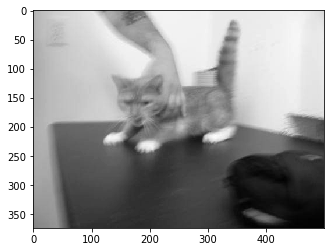

In [18]:
for categore in CATEGORIES:  # do dogs and cats
    path = os.path.join(DIRECTORY,categore)  # create path to dogs and cats
    
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
       
    break  #...and one more!

In [19]:
rs_img_array = cv2.resize(img_array, (100, 100))
rs_img_array.shape

(100, 100)

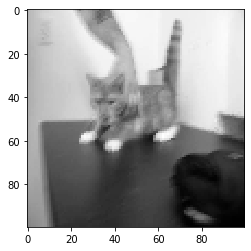

In [20]:
plt.imshow(rs_img_array, cmap="gray")

The following cells will demonstrate how we predict the output of values using our newly trained CNN

we pass the input(in this context the pixel array) into the prediction() function 

In [21]:
prediction = model.predict(X[0:1])

model.predict(X[0:])

In [43]:
print("Here is an array showing the prediction: {} ".format(prediction))
print("Below, each index is explained")

Here is an array showing the prediction: [[0.9926005  0.00739949]] 
Below, each index is explained


In [44]:
print("Chance of cat: {}".format(prediction[0][0])) 
print("chance of dog: {}".format(prediction[0][1])) 

Chance of cat: 0.9926005005836487
chance of dog: 0.007399489637464285


Next ill print  prediction arrays for 7 different inputs as well as the actual label for the 7. This will allow us to compare the model with reality

In [26]:
prediction1 = model.predict(X[8:15])

In [27]:
print(prediction1)

[[9.9260050e-01 7.3994896e-03]
 [9.0458113e-01 9.5418878e-02]
 [9.9951720e-01 4.8284815e-04]
 [9.8778963e-01 1.2210352e-02]
 [5.8682179e-01 4.1317815e-01]
 [8.0969340e-01 1.9030668e-01]
 [3.1714027e-03 9.9682862e-01]]


In [31]:
y[8:15]

array([0, 1, 1, 1, 1, 0, 0])

In [48]:
DIRECTORYTEST = r'C:\Users\Javonne\Dropbox\zzboosdt\code projects\SummerMLProject\chosenImage'
CATEGORIES = ['cats', 'dogs']

dataTEST = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORYTEST, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_arr = cv2.resize(arr, (60, 60))
        dataTEST.append([new_arr, label])

In [49]:
XTEST = []
yTEST = []

for features, label in dataTEST:
    XTEST.append(features)
    yTEST.append(label)

XTEST = np.array(XTEST)
yTEST = np.array(yTEST)

In [54]:
XTEST = XTEST.reshape(-1, 60, 60, 1)

In [55]:
predictionTEST = model.predict(XTEST[0:])

In [56]:
print(predictionTEST)

[[0.713957   0.286043  ]
 [0.00834015 0.9916598 ]]


In [57]:
print(y[0:])

[0 1]


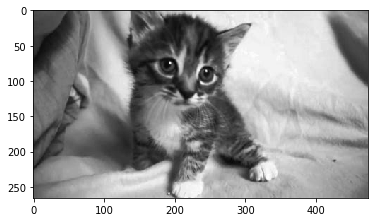

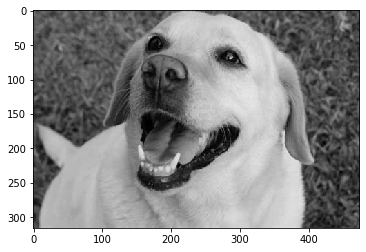

In [60]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DIRECTORYTEST,category)  # create path to dogs and cats
    
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!
        break  # we just want one for now so break
       
